# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2381 Ахметгареев Карим Ильгизович и Самулевич Степан Александрович. Вариант №1.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## **Основные теоретические положения**

### 1. Определение нерекурсивного (FIR) фильтра

Нерекурсивный цифровой фильтр:
$$
y[n] = \sum_{k=-m}^{m} h_k\,x[n+k],
$$
где $h_k$ — коэффициенты фильтра (веса), $x[n]$ — входной сигнал, а $2m+1$ — длина окна усреднения.  


### 2. Локальная полиномиальная аппроксимация

Для сглаживания сигнала в окрестности точки $n$ используется аппроксимация входных значений $x[n+k]$ полиномом степени $p$:
$$
x[n+k] \approx a_0 + a_1 k + a_2 k^2 + \dots + a_p k^p,\quad k=-m,\dots,m.
$$

Коэффициенты полинома $\mathbf{a} = [a_0, a_1, \dots, a_p]^\top$ определяются методом наименьших квадратов (МНК) из условия минимизации суммы квадратов отклонений:
$$
\min_{\mathbf{a}}\ \sum_{k=-m}^{m} \left(x[n+k] - \sum_{r=0}^{p} a_r k^r\right)^2.
$$

### 3. Вывод формулы методом наименьших квадратов (МНК)

Запишем задачу в матричной форме. Пусть:
$$
\mathbf{x} =
\begin{bmatrix}
x[n-m]\\
x[n-m+1]\\
\vdots\\
x[n+m]
\end{bmatrix},\quad
\mathbf{A} =
\begin{bmatrix}
1 & -m & (-m)^2 & \dots & (-m)^p\\
1 & -m+1 & (-m+1)^2 & \dots & (-m+1)^p\\
\vdots & \vdots & \vdots & & \vdots\\
1 & m & m^2 & \dots & m^p
\end{bmatrix}.
$$

Тогда решение задачи МНК задаётся нормальными уравнениями:
$$
(\mathbf{A}^\top \mathbf{A})\,\mathbf{a} = \mathbf{A}^\top \mathbf{x}.
$$

Отсюда получаем:
$$
\mathbf{a} = (\mathbf{A}^\top \mathbf{A})^{-1}\mathbf{A}^\top \mathbf{x}.
$$

Нас интересует значение аппроксимирующего полинома в центральной точке ($k=0$):
$$
y[n] = a_0 = \mathbf{e}_0^\top \mathbf{a},
$$
где $\mathbf{e}_0 = [1, 0, \dots, 0]^\top$. Подставляя найденное $\mathbf{a}$, получаем:
$$
y[n] = \mathbf{e}_0^\top (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top \mathbf{x}.
$$

Это выражение имеет вид линейной свёртки, где
$$
 \mathbf{h}^\top = \mathbf{e}_0^\top (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top.
$$
Таким образом, получаем окончательную форму фильтра:
$$
 y[n] = \sum_{k=-m}^{m} h_k\,x[n+k].
$$



### 4. Симметричность окна и свойства коэффициентов

При симметричном интервале аппроксимации ($k=-m,\dots,m$) и использовании полиномов чётных и нечётных степеней веса $h_k$ также оказываются симметричными:
$$
h_k = h_{-k}.
$$

Нормировка коэффициентов:
$$
H(0) = \sum_{k=-m}^{m} h_k = 1.
$$



### 5. Передаточная функция фильтра

Передаточная функция дискретного фильтра определяется как ДПФ импульсной характеристики:
$$
H(\omega) = \sum_{k=-m}^{m} h_k e^{-j\omega k}.
$$

Для симметричных коэффициентов ($h_k = h_{-k}$) эта сумма упрощается:
$$
 H(\omega) = h_0 + 2\sum_{k=1}^{m} h_k \cos(\omega k). 
$$

### 6. Представление в логарифмической шкале

Для анализа частотных свойств часто используется логарифмическая шкала в децибелах:
$$
 H_{dB}(\omega) = 20 \log_{10} \big| H(\omega) \big|. 
$$




## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики ~H(f). Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы



1. Выведем формулы для передаточной функции фильтра, соответствующего сглаживанию по прямой линии по 2k+1 точкам:
$$y[n] = \frac{1}{2k+1}\sum\limits_{m=-k}^k x[n+m]$$
$$H(f) = \frac{1}{2k+1}\sum_{m=-k}^{k} e^{-j \cdot 2\pi f m}
= e^{-j \cdot 2 \pi f k}\,\frac{\sin\bigl((2k+1)\pi f\bigr)}{(2k+1)\sin(\pi f)}$$
Ниже приведены графики для $k=1, 2, 3$


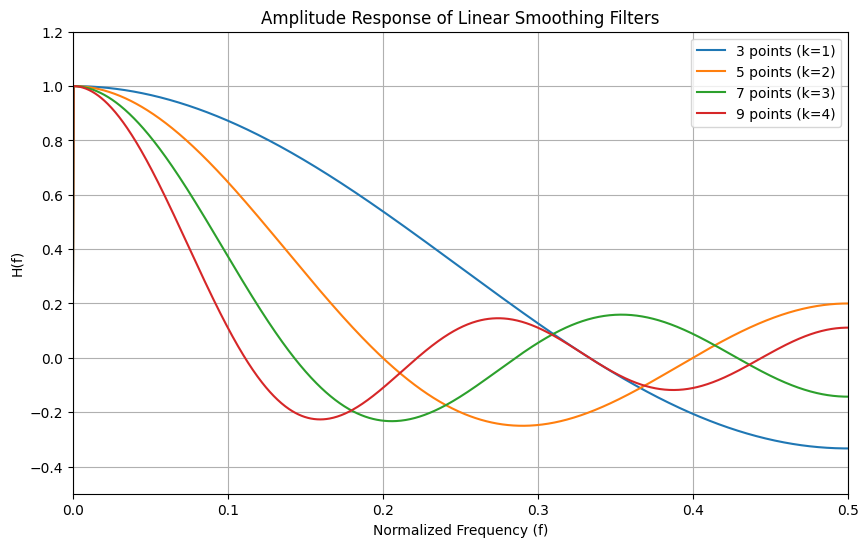

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def H_f_linear(f, k):
    n = 2 * k + 1
    return (np.sin(n * np.pi * f) / (n * np.sin(np.pi * f + 1e-10)))

f = np.linspace(0, 0.5, 1000)
k_values = [1, 2, 3, 4]
labels = ['3 points (k=1)', '5 points (k=2)', '7 points (k=3)', '9 points (k=4)']

plt.figure(figsize=(10, 6))
for k, label in zip(k_values, labels):
    H = H_f_linear(f, k)
    plt.plot(f, H, label=label)


plt.title('Amplitude Response of Linear Smoothing Filters')
plt.xlabel('Normalized Frequency (f)')
plt.ylabel('H(f)')
plt.grid(True)
plt.legend()
plt.ylim(-0.5, 1.2)
plt.xlim(0, 0.5)
plt.show()

1. Выводы:

    Фильтры такого типа имеют выраженные низкочастотные свойства. При увеличении числа точек полоса пропускания сужается, а высокие частоты подавляются сильнее. Однако в отличие от фильтров более высоких порядков наблюдается заметное ослабление полезных низких частот при слишком большом окне.

2. Для сглаживания квадратичным полиномом по 2k+1 точкам:

$$
y[n] = \sum_{m=-k}^{k} h[m] x[n+m], \quad h[m] = \frac {\left({3(2k+1)^{2}-7-20m^{2}}\right)/4}{(2k+1)\left({(2k+1)^{2}-4}\right)/3}
$$

$$
H(f) = \sum_{m=-k}^{k} h[m] e^{-j 2 \pi f m}  = h[0] + 2 \sum_{m=1}^{k} h[m] \cos(2 \pi f m)$$
Вычислим передаточную функцию для конкретных значений $k$:
*   $k=3$ $$y[n] = \sum_{m=-3}^{3} \frac{7 - m^2}{21} x[n+m]$$
$$H(f) = \frac{1}{3} + 2 \left( \frac{2}{7} \cos(2 \pi f) + \frac{1}{7} \cos(4 \pi f) - \frac{2}{21} \cos(6 \pi f) \right)$$
*   $k=4$ $$y[n] = \sum_{m=-4}^{4} \frac{236 - 20m^2}{924} x[n+m]$$
$$H(f) = \frac{59}{231} + 2 \left( \frac{18}{77} \cos(2 \pi f) + \frac{13}{77} \cos(4 \pi f) + \frac{2}{33} \cos(6 \pi f) - \frac{1}{11} \cos(8 \pi f) \right)$$
*   $k=5$ $$y[n] = \sum_{m=-5}^{5} \frac{356 - 20m^2}{1716} x[n+m]$$
$$H(f) = \frac{89}{429} + 2 \left( \frac{28}{143} \cos(2 \pi f) + \frac{23}{143} \cos(4 \pi f) + \frac{44}{429} \cos(6 \pi f) + \frac{3}{143} \cos(8 \pi f) - \frac{4}{143} \cos(10 \pi f) \right)$$
*   $k=6$ $$y[n] = \sum_{m=-6}^{6} \frac{500 - 20m^2}{2860} x[n+m]$$
$$H(f) = \frac{75}{429} + 2 \left( \frac{24}{143} \cos(2 \pi f) + \frac{21}{143} \cos(4 \pi f) + \frac{16}{143} \cos(6 \pi f) + \frac{9}{143} \cos(8 \pi f) + 0 \cdot \cos(10 \pi f) - \frac{11}{143} \cos(12 \pi f) \right)$$





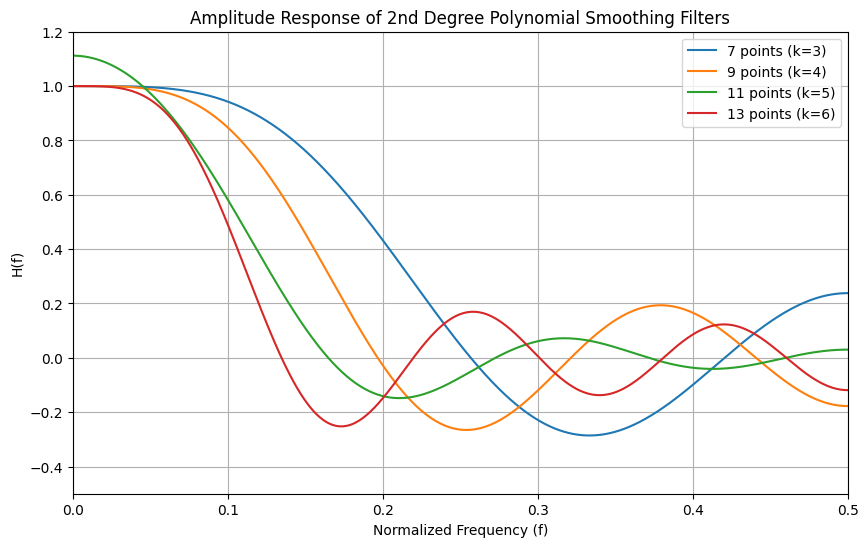

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def H_f_k3(f):
    return (1/3 + 2 * (2/7 * np.cos(2 * np.pi * f) +
                       1/7 * np.cos(4 * np.pi * f) -
                       2/21 * np.cos(6 * np.pi * f)))

def H_f_k4(f):
    return (59/231 + 2 * (18/77 * np.cos(2 * np.pi * f) +
                          13/77 * np.cos(4 * np.pi * f) +
                          2/33 * np.cos(6 * np.pi * f) -
                          1/11 * np.cos(8 * np.pi * f)))

def H_f_k5(f):
    return (89/429 + 2 * (28/143 * np.cos(2 * np.pi * f) +
                          23/143 * np.cos(4 * np.pi * f) +
                          44/429 * np.cos(6 * np.pi * f) +
                          3/143 * np.cos(8 * np.pi * f) -
                          4/143 * np.cos(10 * np.pi * f)))

def H_f_k6(f):
    return (75/429 + 2 * (24/143 * np.cos(2 * np.pi * f) +
                          21/143 * np.cos(4 * np.pi * f) +
                          16/143 * np.cos(6 * np.pi * f) +
                          9/143 * np.cos(8 * np.pi * f) +
                          0 * np.cos(10 * np.pi * f) -
                          11/143 * np.cos(12 * np.pi * f)))


f = np.linspace(0, 0.5, 1000)


H_k3 = H_f_k3(f)
H_k4 = H_f_k4(f)
H_k5 = H_f_k5(f)
H_k6 = H_f_k6(f)


plt.figure(figsize=(10, 6))
plt.plot(f, H_k3, label='7 points (k=3)')
plt.plot(f, H_k4, label='9 points (k=4)')
plt.plot(f, H_k5, label='11 points (k=5)')
plt.plot(f, H_k6, label='13 points (k=6)')

plt.title('Amplitude Response of 2nd Degree Polynomial Smoothing Filters')
plt.xlabel('Normalized Frequency (f)')
plt.ylabel('H(f)')
plt.grid(True)
plt.legend()
plt.ylim(-0.5, 1.2)
plt.xlim(0, 0.5)
plt.show()

2. Выводы:

    Данные фильтры обладают более плавным спадом амплитудной характеристики и лучше сохраняют форму медленно изменяющихся сигналов. Высокочастотное подавление выражено сильнее, чем у фильтров первой степени, но без заметного искажения фазы.

3. Для сглаживания полиномом 4 степени по 2k+1 точкам вычислим передаточную функцию для конкретных значений $k$:
$$H(f) = \sum_{m=-k}^{k} h[m] e^{-j 2 \pi f m}  = h[0] + 2 \sum_{m=1}^{k} h[m] \cos(2 \pi f m)  $$
*   $k=4$ $$y[n] = \sum_{m=-4}^{4} \frac{15 -55m +30m^{2} +135m^{3} +179m^{4}}{429} x[n+m]$$
$$  H(f) = \frac{179}{429} + 2 \left( \frac{135}{429} \cos(2 \pi f) + \frac{30}{429} \cos(4 \pi f) - \frac{55}{429} \cos(6 \pi f) + \frac{15}{429} \cos(8 \pi f) \right)  $$
*   $k=5$ $$  y[n] = \sum_{m=-5}^{5} \frac{18 -45m -10m^{2} +60m^{3} +120m^{4} +143m^{5}}{429} x[n+m]  $$
$$  H(f) = \frac{143}{429}+ 2 \left( \frac{120}{429} \cos(2 \pi f) + \frac{60}{429} \cos(4 \pi f) - \frac{10}{429} \cos(6 \pi f) - \frac{45}{429} \cos(8 \pi f) + \frac{18}{429} \cos(10 \pi f) \right)  $$
*   $k=6$ $$  y[n] = \sum_{m=-6}^{6} \frac{110 -198m -135m^{2} +110m^{3} +390m^{4} +600m^{5} +677m^{6}}{2431} x[n+m] $$
$$  H(f) = \frac{677}{2431} + 2 \left( \frac{600}{2431} \cos(2 \pi f) + \frac{390}{2431} \cos(4 \pi f) + \frac{110}{2431} \cos(6 \pi f) - \frac{135}{2431} \cos(8 \pi f) - \frac{198}{2431} \cos(10 \pi f) + \frac{110}{2431} \cos(12 \pi f) \right)$$
*   $k=7$ $$  y[n] = \sum_{m=-7}^{7} \frac{2145 -2860m -2937m^{2} -165m^{3} +3755m^{4} +7500m^{5} +10125m^{6} +11063m^{7}}{46189} x[n+m] $$
$$  H(f) = \frac{11063}{46189} + 2 \left( \frac{10125}{46189} \cos(2 \pi f) + \frac{7500}{46189} \cos(4 \pi f) + \frac{3755}{46189} \cos(6 \pi f) - \frac{165}{46189} \cos(8 \pi f) - \frac{2937}{46189} \cos(10 \pi f) - \frac{2860}{46189} \cos(12 \pi f) + \frac{2145}{46189} \cos(14 \pi f) \right)  $$

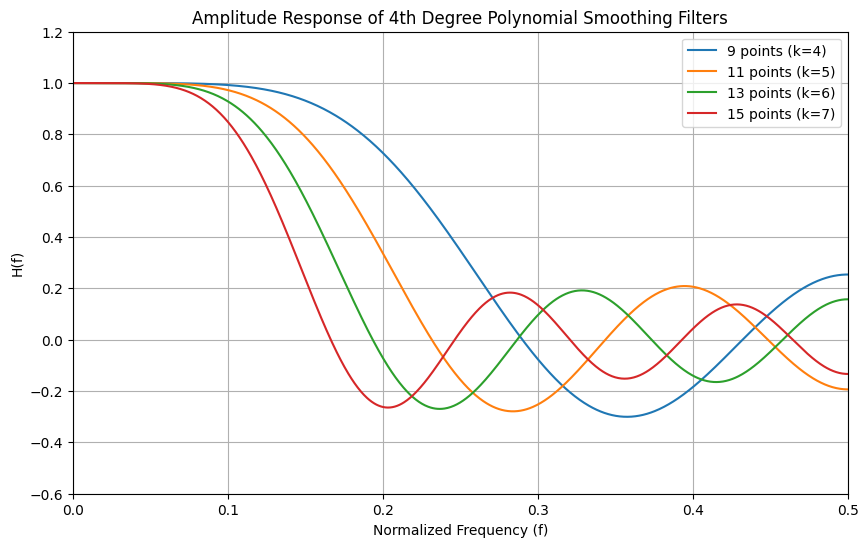

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def H_f_k4(f):
    return (179/429 + 2 * (135/429 * np.cos(2 * np.pi * f) +
                           30/429 * np.cos(4 * np.pi * f) -
                           55/429 * np.cos(6 * np.pi * f) +
                           15/429 * np.cos(8 * np.pi * f)))

def H_f_k5(f):
    return (143/429 + 2 * (120/429 * np.cos(2 * np.pi * f) +
                           60/429 * np.cos(4 * np.pi * f) -
                           10/429 * np.cos(6 * np.pi * f) -
                           45/429 * np.cos(8 * np.pi * f) +
                           18/429 * np.cos(10 * np.pi * f)))

def H_f_k6(f):
    return (677/2431 + 2 * (600/2431 * np.cos(2 * np.pi * f) +
                            390/2431 * np.cos(4 * np.pi * f) +
                            110/2431 * np.cos(6 * np.pi * f) -
                            135/2431 * np.cos(8 * np.pi * f) -
                            198/2431 * np.cos(10 * np.pi * f) +
                            110/2431 * np.cos(12 * np.pi * f)))

def H_f_k7(f):
    return (11063/46189 + 2 * (10125/46189 * np.cos(2 * np.pi * f) +
                               7500/46189 * np.cos(4 * np.pi * f) +
                               3755/46189 * np.cos(6 * np.pi * f) -
                               165/46189 * np.cos(8 * np.pi * f) -
                               2937/46189 * np.cos(10 * np.pi * f) -
                               2860/46189 * np.cos(12 * np.pi * f) +
                               2145/46189 * np.cos(14 * np.pi * f)))

f = np.linspace(0, 0.5, 1000)

H_k4 = H_f_k4(f)
H_k5 = H_f_k5(f)
H_k6 = H_f_k6(f)
H_k7 = H_f_k7(f)

plt.figure(figsize=(10, 6))
plt.plot(f, H_k4, label='9 points (k=4)')
plt.plot(f, H_k5, label='11 points (k=5)')
plt.plot(f, H_k6, label='13 points (k=6)')
plt.plot(f, H_k7, label='15 points (k=7)')

plt.title('Amplitude Response of 4th Degree Polynomial Smoothing Filters')
plt.xlabel('Normalized Frequency (f)')
plt.ylabel('H(f)')
plt.grid(True)
plt.legend()
plt.ylim(-0.6, 1.2)
plt.xlim(0, 0.5)
plt.show()

4. Выводы:

    Фильтры высокой степени аппроксимации обладают хорошим балансом между точностью сохранения сигнала и подавлением шума. Они более устойчивы к мелким колебаниям данных, обеспечивая минимальные искажения основной формы сигнала. 

4. Сглаживание по формулам Спенсера:
$$H(f) = \sum_{m=-k}^{k} h[m] e^{-j 2 \pi f m} = h[0] + 2 \sum_{m=1}^{k} h[m] \cos(2 \pi f m)$$
Вычислим передаточную функцию для конкретных значений $   k   $:

* $k=7$

$$y[n] = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$$
$$H(f) = \frac{74}{320} + 2 \left( \frac{67}{320} \cos(2 \pi f) + \frac{46}{320} \cos(4 \pi f) + \frac{21}{320} \cos(6 \pi f) + \frac{3}{320} \cos(8 \pi f) - \frac{5}{320} \cos(10 \pi f) - \frac{6}{320} \cos(12 \pi f) - \frac{3}{320} \cos(14 \pi f) \right)$$


* $k=10$

$$y[n] = \frac{1}{350} (-s_{n-10} - 3s_{n-9} - 5s_{n-8} + 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} + 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - s_{n+10})$$
$$H(f) = \frac{60}{350} + 2 \left( \frac{57}{350} \cos(2 \pi f) + \frac{47}{350} \cos(4 \pi f) + \frac{33}{350} \cos(6 \pi f) + \frac{18}{350} \cos(8 \pi f) + \frac{6}{350} \cos(10 \pi f) - \frac{2}{350} \cos(12 \pi f) - \frac{5}{350} \cos(14 \pi f) - \frac{5}{350} \cos(16 \pi f) - \frac{3}{350} \cos(18 \pi f) - \frac{1}{350} \cos(20 \pi f) \right)$$


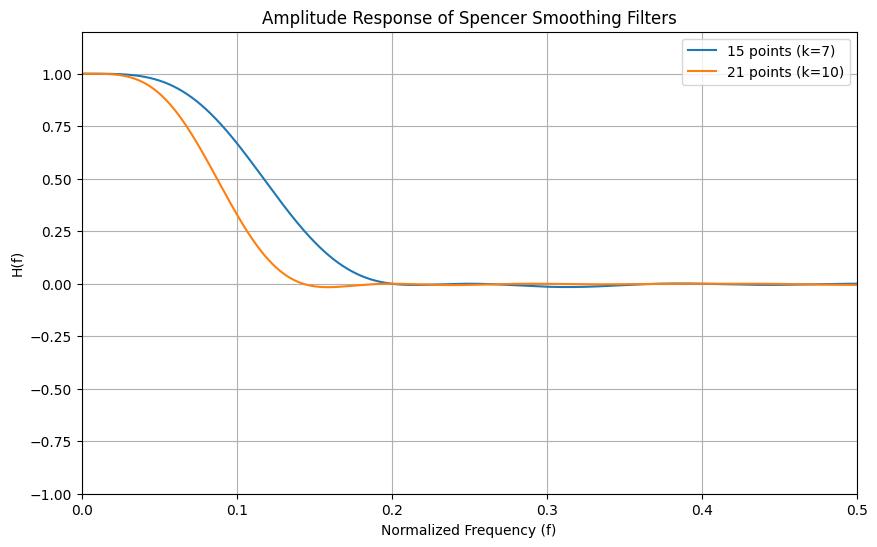

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def H_f_k7(f):
    return (74/320 + 2 * (67/320 * np.cos(2 * np.pi * f) +
                          46/320 * np.cos(4 * np.pi * f) +
                          21/320 * np.cos(6 * np.pi * f) +
                          3/320 * np.cos(8 * np.pi * f) -
                          5/320 * np.cos(10 * np.pi * f) -
                          6/320 * np.cos(12 * np.pi * f) -
                          3/320 * np.cos(14 * np.pi * f)))

def H_f_k10(f):
    return (60/350 + 2 * (57/350 * np.cos(2 * np.pi * f) +
                          47/350 * np.cos(4 * np.pi * f) +
                          33/350 * np.cos(6 * np.pi * f) +
                          18/350 * np.cos(8 * np.pi * f) +
                          6/350 * np.cos(10 * np.pi * f) -
                          2/350 * np.cos(12 * np.pi * f) -
                          5/350 * np.cos(14 * np.pi * f) -
                          5/350 * np.cos(16 * np.pi * f) -
                          3/350 * np.cos(18 * np.pi * f) -
                          1/350 * np.cos(20 * np.pi * f)))
# Диапазон частот
f = np.linspace(0, 0.5, 1000)  # Нормированная частота от 0 до 0.5

H_k7 = H_f_k7(f)
H_k10 = H_f_k10(f)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(f, H_k7, label='15 points (k=7)')
plt.plot(f, H_k10, label='21 points (k=10)')

# Настройки графика
plt.title('Amplitude Response of Spencer Smoothing Filters')
plt.xlabel('Normalized Frequency (f)')
plt.ylabel('H(f)')
plt.grid(True)
plt.legend()
plt.ylim(-1, 1.2)  # Учитываем, что H(f) для сглаживающих фильтров обычно положительна
plt.xlim(0, 0.5)
plt.show()

4. Выводы:

    Фильтры Спенсера обеспечивают более строгое разделение низких и высоких частот. По сравнению с полиномиальными фильтрами аналогичной длины, они обладают более выраженной зоной подавления и плавным спадом переходной области. Применяются для сильного сглаживания временных рядов.

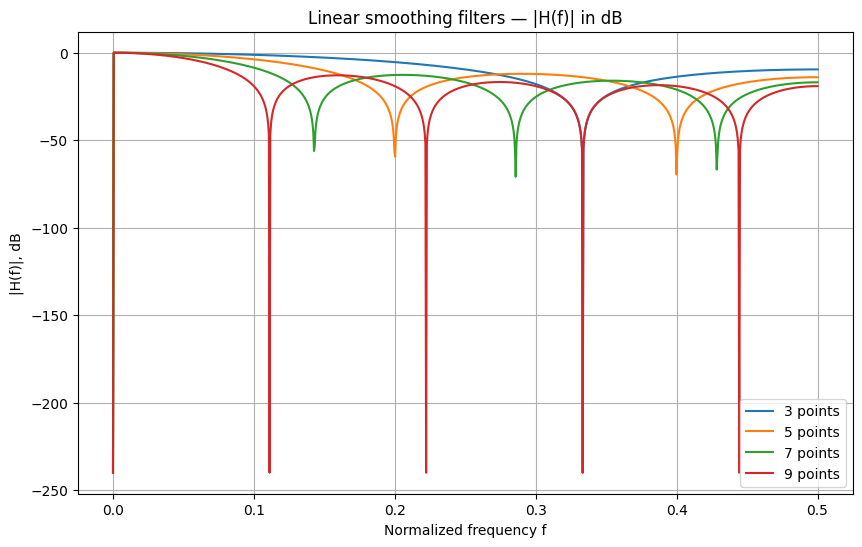

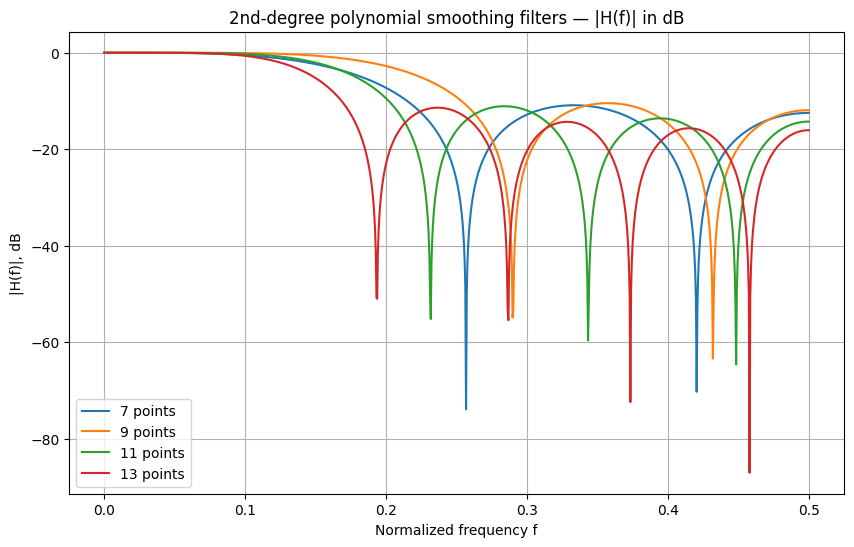

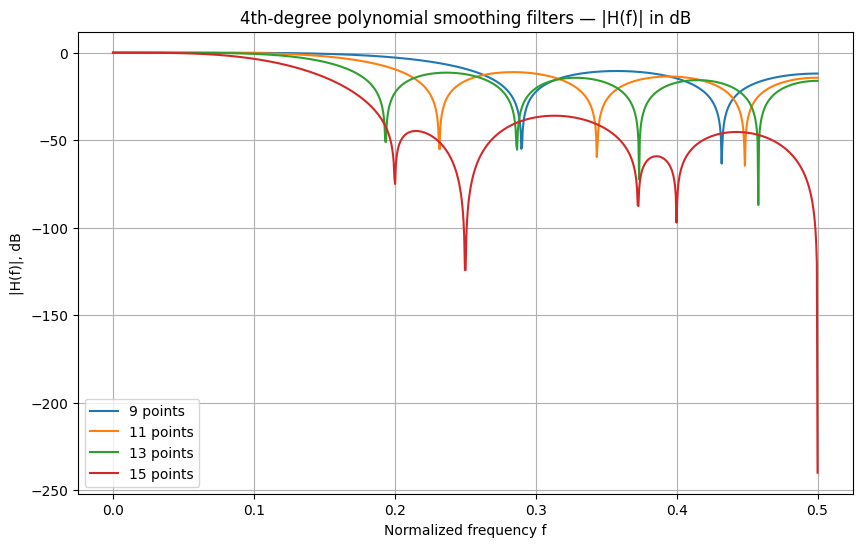

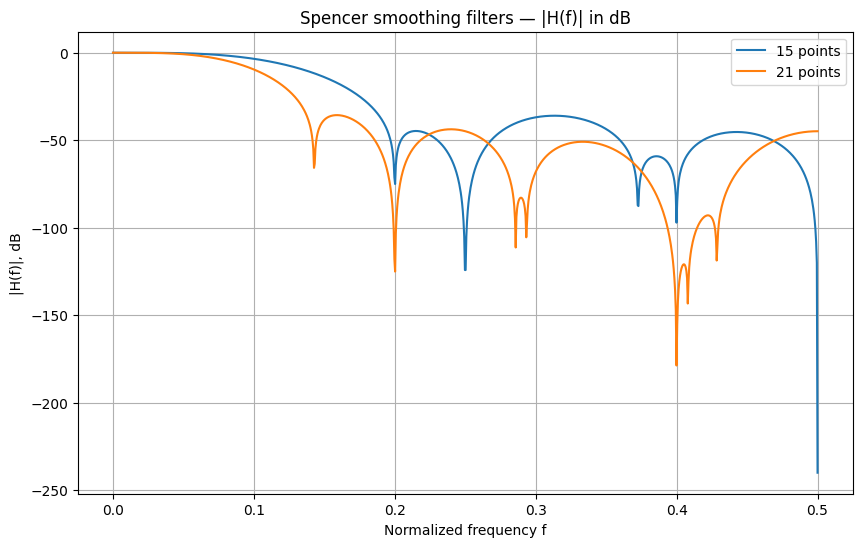

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def H_to_dB(H):
    return 20 * np.log10(np.abs(H) + 1e-12) 

f = np.linspace(0, 0.5, 1000)

k_values = [1, 2, 3, 4]
labels_linear = ['3 points', '5 points', '7 points', '9 points']

plt.figure(figsize=(10, 6))
for k, label in zip(k_values, labels_linear):
    H = np.sin((2*k+1)*np.pi*f) / ((2*k+1)*np.sin(np.pi*f) + 1e-12)
    plt.plot(f, H_to_dB(H), label=label)
plt.title('Linear smoothing filters — |H(f)| in dB')
plt.xlabel('Normalized frequency f')
plt.ylabel('|H(f)|, dB')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(f, H_to_dB(H_f_k3(f)), label='7 points')
plt.plot(f, H_to_dB(H_f_k4(f)), label='9 points')
plt.plot(f, H_to_dB(H_f_k5(f)), label='11 points')
plt.plot(f, H_to_dB(H_f_k6(f)), label='13 points')
plt.title('2nd-degree polynomial smoothing filters — |H(f)| in dB')
plt.xlabel('Normalized frequency f')
plt.ylabel('|H(f)|, dB')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(f, H_to_dB(H_f_k4(f)), label='9 points')
plt.plot(f, H_to_dB(H_f_k5(f)), label='11 points')
plt.plot(f, H_to_dB(H_f_k6(f)), label='13 points')
plt.plot(f, H_to_dB(H_f_k7(f)), label='15 points')
plt.title('4th-degree polynomial smoothing filters — |H(f)| in dB')
plt.xlabel('Normalized frequency f')
plt.ylabel('|H(f)|, dB')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(f, H_to_dB(H_f_k7(f)), label='15 points')
plt.plot(f, H_to_dB(H_f_k10(f)), label='21 points')
plt.title('Spencer smoothing filters — |H(f)| in dB')
plt.xlabel('Normalized frequency f')
plt.ylabel('|H(f)|, dB')
plt.grid(True)
plt.legend()
plt.show()

Графики в логарифмической шкале показывают ту же частотную зависимость, но делают акцент на динамическом диапазоне ослабления.

В них чётко видно:

насколько плавно или резко фильтр «обрезает» высокие частоты;

какие диапазоны частот проходят без искажений (0 дБ);

какие полностью подавляются (−40 дБ и ниже).

Таким образом, дБ-графики служат не просто для визуализации, а для оценки эффективности и избирательности фильтра.

 **Сравнительный анализ.**  
   Все полученные фильтры являются симметричными, имеют линейную фазу и коэффициенты, сумма которых равна единице.  
   Увеличение числа точек усиливает сглаживание, а повышение степени полинома обеспечивает лучшее сохранение формы сигнала в низкочастотной области

### Выводы  
В ходе выполнения практической работы были получены формулы для передаточных функций нерекурсивных фильтров, соответствующих сглаживанию полиномами 1, 2, 4 степеней и сглаживанию по формуле Спенсера для разного количества точек приближения. По полученным формулам были построены и проанализированы графики передаточной функции H ̃(ω). Также был проведён сопоставительный анализ передаточных функций исследуемых фильтров.
